In [53]:
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Y00_Y08_5features = np.load('/disk1/pore_data/NanoporeTERs/Y00_Y08_5features_4149examples.npy','r')
#np.save('/disk1/pore_data/NanoporeTERs/Y00_Y08_raw20000_4149examples.npy',stacked_Y00_Y08_raw)
Y00_Y08_classes = np.load('/disk1/pore_data/NanoporeTERs/Y00_Y08_classes_4149examples.npy','r')

In [12]:
Homopol_12aa_5features = np.load('/disk1/pore_data/NanoporeTERs/Homopolymer_12aa_5features_1569examples.npy','r')
#np.save('/disk1/pore_data/NanoporeTERs/Homopolymer_12aa_raw20000_1569examples.npy',stacked_12aa_raw)
Homopol_12aa_classes = np.load('/disk1/pore_data/NanoporeTERs/Homopolymer_12aa_classes_1569examples.npy','r')



In [23]:
Y0to8_Homopol_12aa_5features = np.vstack((Y00_Y08_5features_1569, Homopol_12aa_5features))
Y0to8_Homopol_12aa_classes = np.vstack((Y00_Y08_classes_1569, Homopol_12aa_classes))

print np.shape(Y0to8_Homopol_12aa_5features)
print np.shape(Y0to8_Homopol_12aa_classes)
np.save('/disk1/pore_data/NanoporeTERs/Y0to8_Homopol_12aa_5features_1569examples.npy',Y0to8_Homopol_12aa_5features)
np.save('/disk1/pore_data/NanoporeTERs/Y0to8_Homopol_12aa_classes_1569examples.npy',Y0to8_Homopol_12aa_classes)





(32949, 5)
(32949, 1)


In [81]:
X_data = Y00_Y08_5features
y_data = Y00_Y08_classes

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)




from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=300, max_depth=100)

random_forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
print accuracy_score(y_test, y_predict)

from sklearn.metrics import confusion_matrix

import pandas as pd

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08'],
    index=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08']
)

/ssd1/home/jmdn/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.913881748072


,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08
Y00,959,10,10,1,7,1,6,6,28
Y01,19,974,20,3,1,1,4,3,6
Y02,9,31,924,18,14,9,5,2,8
Y03,6,2,24,962,31,5,0,1,1
Y04,23,3,16,43,862,27,13,10,9
Y05,11,4,25,8,41,970,3,9,6
Y06,7,7,6,5,12,28,956,9,10
Y07,21,5,6,2,6,10,12,991,20
Y08,36,3,10,8,8,2,9,19,934


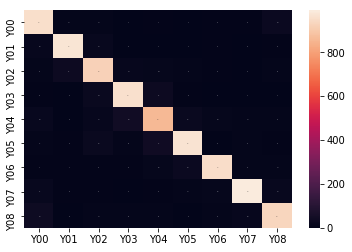

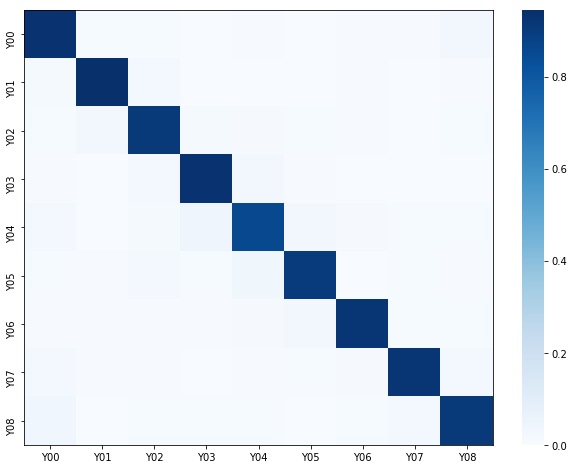

Feature ranking:
1. feature 4 (0.299618)
2. feature 0 (0.259198)
3. feature 1 (0.226858)
4. feature 3 (0.160332)
5. feature 2 (0.053994)


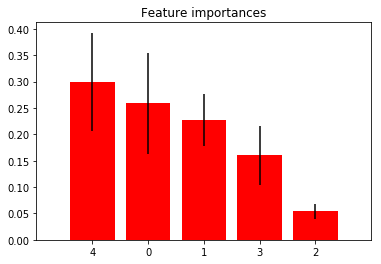

In [85]:
df = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08'],
    index=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08']
    #index=['p1']
)
#a = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a)
sns.heatmap(df, annot=True, annot_kws={'size':1}, fmt='g')
plt.show()


plt.figure(figsize = (10.5,8))

df_norm_col = df.div(df.sum(axis=1), axis=0)
sns.heatmap(df_norm_col, cmap='Blues')

plt.savefig('/disk1/pore_data/NanoporeTERs/Figures/ConfusionMatrix_Y0toY8_12aa.svg')
plt.show()





importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [87]:
X_data = Homopol_12aa_5features
y_data = Homopol_12aa_classes

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)




from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=300, max_depth=100)

random_forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
print accuracy_score(y_test, y_predict)

from sklearn.metrics import confusion_matrix

import pandas as pd

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['A','D','E','G','H','M','N','P','Q','R','S','T'],
    index=['A','D','E','G','H','M','N','P','Q','R','S','T']
)

/ssd1/home/jmdn/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.782451667729


,A,D,E,G,H,M,N,P,Q,R,S,T
A,248,4,0,0,9,114,3,4,3,4,0,1
D,2,356,8,6,4,2,1,2,4,7,3,4
E,1,17,350,2,3,3,12,8,0,2,1,5
G,3,6,2,335,6,1,1,0,2,36,6,4
H,3,4,2,9,331,6,3,2,1,17,2,3
M,136,6,5,1,26,195,5,9,6,10,4,7
N,6,1,10,0,9,2,304,30,25,2,5,6
P,7,1,3,0,6,9,33,297,14,4,1,11
Q,9,1,1,0,4,7,35,14,273,1,2,6
R,1,2,3,20,4,2,3,1,9,335,3,3


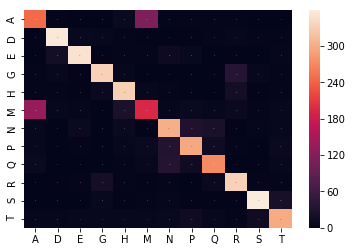

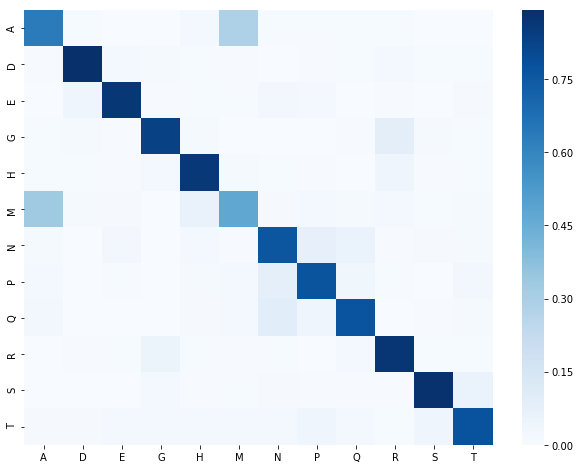

Feature ranking:
1. feature 4 (0.236065)
2. feature 3 (0.219326)
3. feature 1 (0.208293)
4. feature 0 (0.196360)
5. feature 2 (0.139958)


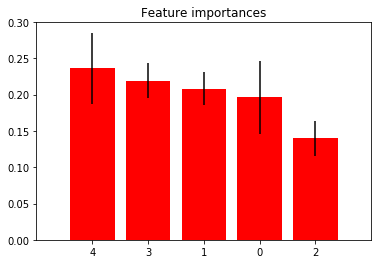

In [88]:
df = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['A','D','E','G','H','M','N','P','Q','R','S','T'],
    index=['A','D','E','G','H','M','N','P','Q','R','S','T']
    #index=['p1']
)
#a = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a)
sns.heatmap(df, annot=True, annot_kws={'size':1}, fmt='g')
plt.show()


plt.figure(figsize = (10.5,8))

df_norm_col = df.div(df.sum(axis=1), axis=0)
sns.heatmap(df_norm_col, cmap='Blues')

plt.savefig('/disk1/pore_data/NanoporeTERs/Figures/ConfusionMatrix_Homopol_12aa.svg')

plt.show()





importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [89]:
X_data = Y0to8_Homopol_12aa_5features
y_data = Y0to8_Homopol_12aa_classes

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)




from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=300, max_depth=100)

random_forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
print accuracy_score(y_test, y_predict)

from sklearn.metrics import confusion_matrix

import pandas as pd

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08','A','D','E','G','H','M','N','P','Q','R','S','T'],
    index=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08','A','D','E','G','H','M','N','P','Q','R','S','T']
)

/ssd1/home/jmdn/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.777615926196


,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,A,...,E,G,H,M,N,P,Q,R,S,T
Y00,325,3,0,0,0,1,0,3,2,0,...,2,8,3,4,0,0,0,14,5,10
Y01,5,372,3,1,1,0,0,0,0,2,...,0,7,1,5,0,2,0,2,2,5
Y02,1,2,313,4,1,1,0,0,0,9,...,0,4,14,20,0,3,2,0,1,3
Y03,0,1,2,335,5,0,0,0,0,13,...,0,0,3,6,0,2,5,1,2,0
Y04,3,2,3,9,309,10,4,5,0,4,...,1,3,5,5,6,11,22,9,1,1
Y05,0,0,0,1,12,320,3,0,0,4,...,0,1,3,3,22,3,26,2,1,0
Y06,0,1,0,0,3,10,343,0,3,1,...,0,1,1,2,11,9,4,0,1,2
Y07,3,0,1,1,1,1,1,349,6,0,...,2,1,2,2,3,3,2,3,1,7
Y08,8,2,3,2,0,3,2,1,322,2,...,6,2,4,5,5,2,3,1,40,4
A,0,2,4,23,1,0,0,0,0,217,...,3,0,15,96,2,4,4,6,0,1


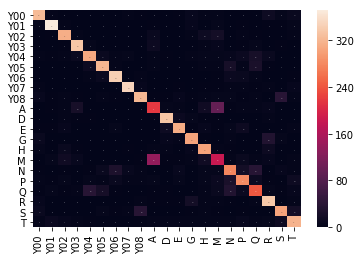

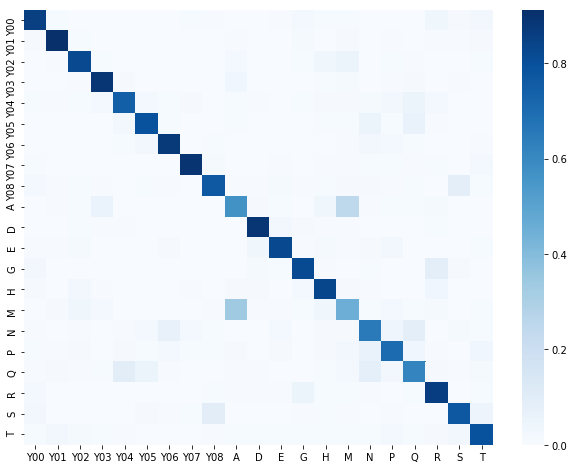

Feature ranking:
1. feature 4 (0.232388)
2. feature 3 (0.220448)
3. feature 1 (0.218666)
4. feature 0 (0.203057)
5. feature 2 (0.125441)


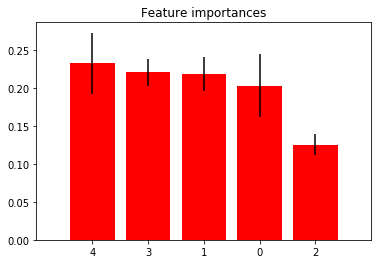

In [90]:
df = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08','A','D','E','G','H','M','N','P','Q','R','S','T'],
    index=['Y00', 'Y01', 'Y02','Y03','Y04','Y05', 'Y06', 'Y07','Y08','A','D','E','G','H','M','N','P','Q','R','S','T']
    #index=['p1']
)
#a = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a)
sns.heatmap(df, annot=True, annot_kws={'size':1}, fmt='g')
plt.show()

plt.figure(figsize = (10.5,8))

df_norm_col = df.div(df.sum(axis=1), axis=0)
sns.heatmap(df_norm_col, cmap='Blues')

plt.savefig('/disk1/pore_data/NanoporeTERs/Figures/ConfusionMatrix_Y0toY8_Homopol_12aa.svg')

plt.show()






importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

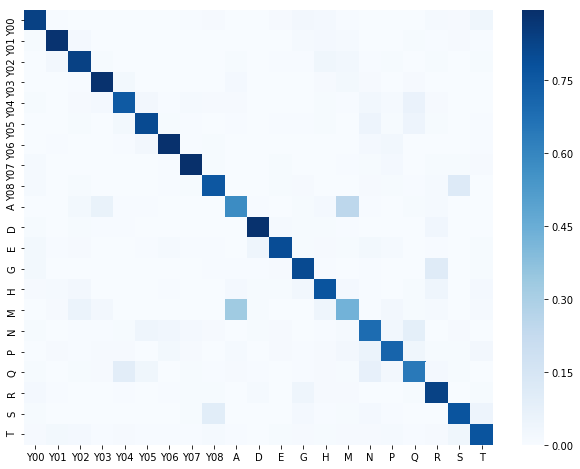

In [76]:
plt.figure(figsize = (10.5,8))

df_norm_col = df.div(df.sum(axis=1), axis=0)
sns.heatmap(df_norm_col, cmap='Blues')
plt.show()

In [63]:
np.save('/disk1/pore_data/NanoporeTERs/Figures/tsne_Y0to8_Homopol_12aa_no_min.npy',X_tsne)
np.save('/disk1/pore_data/NanoporeTERs/Figures/tsne_Y0to8_Homopol_12aa_no_min_classes.npy',Y0to8_Homopol_12aa_classes_f)
